# Data and data split

In [14]:
from sklearn.model_selection import train_test_split
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("sajidsaifi/prostate-cancer")
print(path)

dataset = pd.read_csv(path + "/Prostate_Cancer.csv")

Y = dataset['diagnosis_result']
X = dataset.drop('diagnosis_result', axis = 1)
Y = pd.DataFrame({'is Beaning':[1 if d == 'B' else 0 for d in Y ]})


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,stratify=Y ,random_state=42)

pd.concat([x_train, y_train], axis=1)

/home/franio/.cache/kagglehub/datasets/sajidsaifi/prostate-cancer/versions/1


,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,is Beaning
58,59,22,15,83,527,0.081,0.038,0.182,0.055,1
69,70,17,21,81,503,0.098,0.052,0.159,0.057,1
8,9,19,24,88,520,0.127,0.193,0.235,0.074,0
52,53,25,15,76,438,0.083,0.048,0.187,0.061,1
51,52,19,22,87,572,0.077,0.061,0.135,0.060,1
...,...,...,...,...,...,...,...,...,...,...
89,90,12,23,96,652,0.113,0.134,0.212,0.063,1
36,37,18,12,94,633,0.098,0.110,0.189,0.061,0
67,68,18,12,72,394,0.081,0.047,0.152,0.057,1
15,16,22,19,97,659,0.114,0.160,0.230,0.071,0


## Data visualisation

### Scatter Matrix

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='radius', ylabel='id'>,
        <Axes: xlabel='texture', ylabel='id'>,
        <Axes: xlabel='perimeter', ylabel='id'>,
        <Axes: xlabel='area', ylabel='id'>,
        <Axes: xlabel='smoothness', ylabel='id'>,
        <Axes: xlabel='compactness', ylabel='id'>,
        <Axes: xlabel='symmetry', ylabel='id'>,
        <Axes: xlabel='fractal_dimension', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='radius'>,
        <Axes: xlabel='radius', ylabel='radius'>,
        <Axes: xlabel='texture', ylabel='radius'>,
        <Axes: xlabel='perimeter', ylabel='radius'>,
        <Axes: xlabel='area', ylabel='radius'>,
        <Axes: xlabel='smoothness', ylabel='radius'>,
        <Axes: xlabel='compactness', ylabel='radius'>,
        <Axes: xlabel='symmetry', ylabel='radius'>,
        <Axes: xlabel='fractal_dimension', ylabel='radius'>],
       [<Axes: xlabel='id', ylabel='texture'>,
        <Axes: xlabel='radius', ylabel='texture

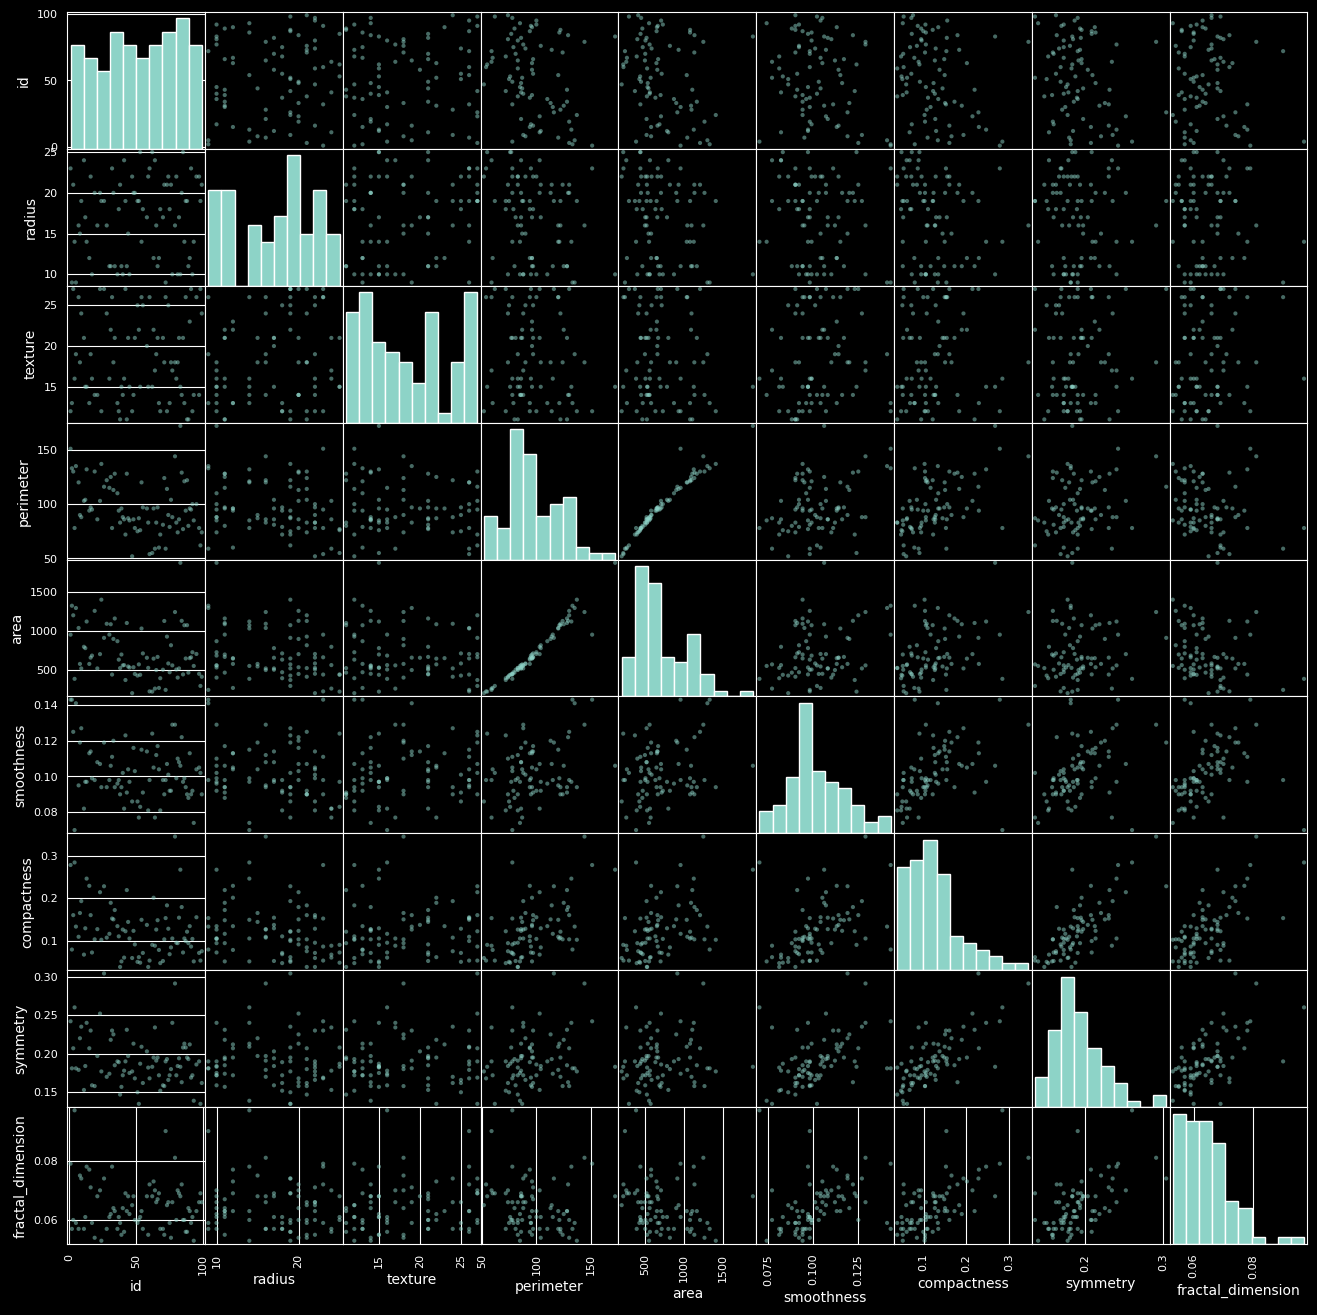

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(x_train, figsize=(16, 16))

### Correlaction matrix

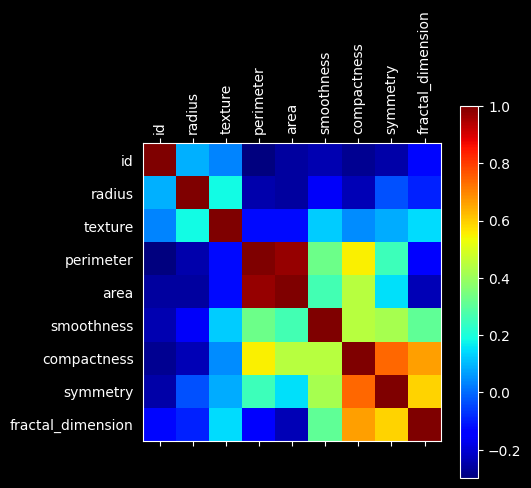

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,0.090770,0.032144,-0.298544,-0.261674,-0.239047,-0.275812,-0.248906,-0.127501
radius,0.090770,1.000000,0.184763,-0.247243,-0.262459,-0.160472,-0.235392,-0.033256,-0.092521
texture,0.032144,0.184763,1.000000,-0.123791,-0.121653,0.123299,0.045228,0.084364,0.144095
perimeter,-0.298544,-0.247243,-0.123791,1.000000,0.974357,0.327659,0.550212,0.249312,-0.145468
area,-0.261674,-0.262459,-0.121653,0.974357,1.000000,0.264074,0.442910,0.149316,-0.233782
smoothness,-0.239047,-0.160472,0.123299,0.327659,0.264074,1.000000,0.443351,0.419839,0.305625
compactness,-0.275812,-0.235392,0.045228,0.550212,0.442910,0.443351,1.000000,0.739339,0.664041
symmetry,-0.248906,-0.033256,0.084364,0.249312,0.149316,0.419839,0.739339,1.000000,0.591772
fractal_dimension,-0.127501,-0.092521,0.144095,-0.145468,-0.233782,0.305625,0.664041,0.591772,1.000000


In [16]:
from matplotlib import pyplot as plt

names = x_train.columns
corr_mtx = (x_train).corr(method='pearson')
plt.matshow(corr_mtx, cmap="jet")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

corr_mtx

## Dropping strongly corralated data

In [17]:
x_train.drop('area', axis=1, inplace=True)
x_test.drop('area', axis=1, inplace=True)

x_train

,id,radius,texture,perimeter,smoothness,compactness,symmetry,fractal_dimension
58,59,22,15,83,0.081,0.038,0.182,0.055
69,70,17,21,81,0.098,0.052,0.159,0.057
8,9,19,24,88,0.127,0.193,0.235,0.074
52,53,25,15,76,0.083,0.048,0.187,0.061
51,52,19,22,87,0.077,0.061,0.135,0.060
...,...,...,...,...,...,...,...,...
89,90,12,23,96,0.113,0.134,0.212,0.063
36,37,18,12,94,0.098,0.110,0.189,0.061
67,68,18,12,72,0.081,0.047,0.152,0.057
15,16,22,19,97,0.114,0.160,0.230,0.071


# Model, sample_weights, optimization

## Metric function

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



{'accuracy': 1.0, 'roc_score': 1.0}

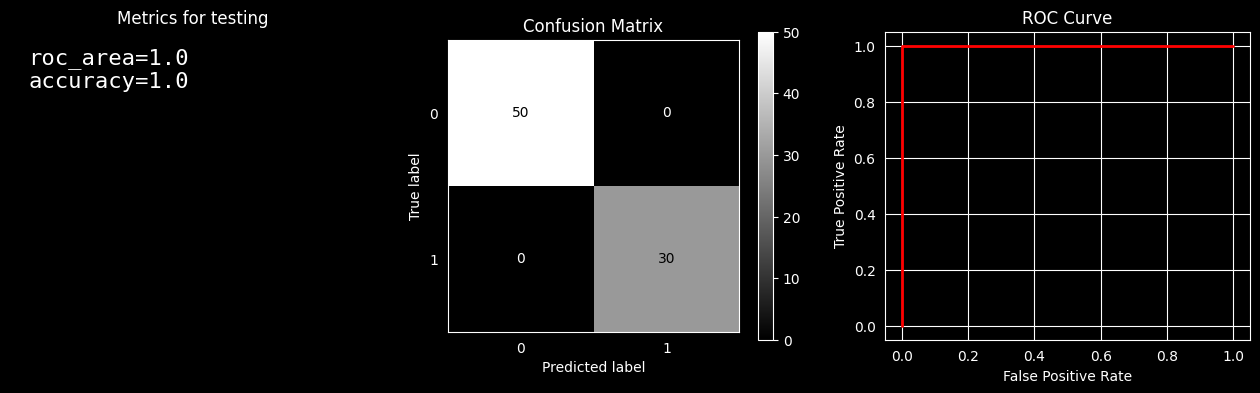

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")

## Sample weights and pipline

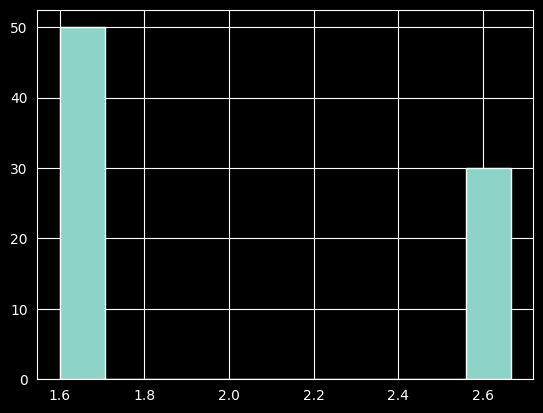

In [19]:
class_1_f = np.sum(y_train == 1, axis=0)/len(y_train)
class_0_f = np.sum(y_train == 0, axis=0) / len(y_train)

class_w = np.array([
    1 / class_1_f,  # Weight for class 1 (Beaning)
    1 / class_0_f   # Weight for class 0 (Non-Beaning)
]).ravel()


weights = [class_w[0] if c == 1 else class_w[1] for c in y_train['is Beaning'].values]
plt.hist(weights)
plt.show()

### Pipe

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipe = Pipeline([('scaler', StandardScaler()), ('features_selector', SelectKBest(k=8)), ('classifier', LogisticRegression())])
pipe.fit(x_train, y_train['is Beaning'].values, **{'classifier__sample_weight': weights})

Pipeline(steps=[('scaler', StandardScaler()),
                ('features_selector', SelectKBest(k=8)),
                ('classifier', LogisticRegression())])

## Pred for not optimized model

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



{'accuracy': 0.85, 'roc_score': 0.9791666666666666}

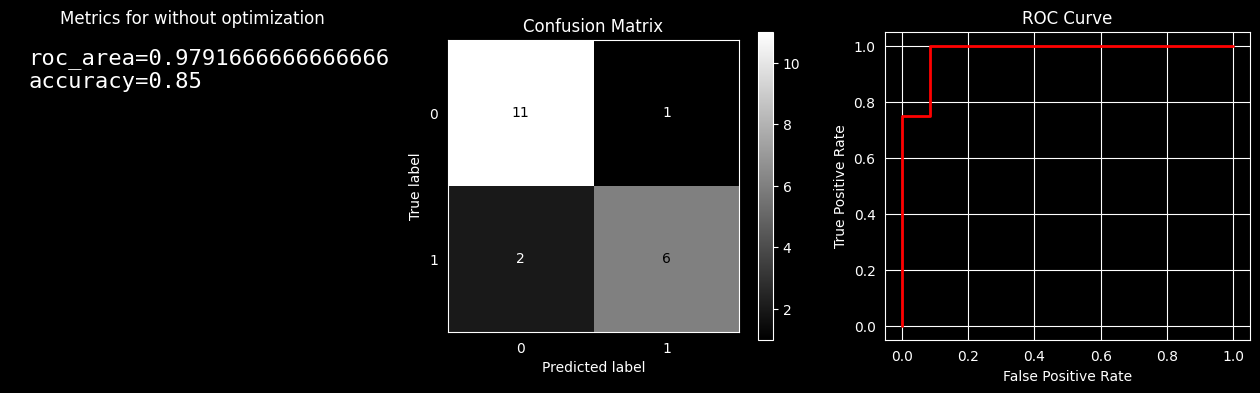

In [21]:
preds = pipe.predict(x_test)
probs = pipe.predict_proba(x_test)[:,1]

metrics(preds, probs, y_test['is Beaning'].values, 'without optimization')

# Optimized pipe

In [26]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import f_classif

optuna.logging.set_verbosity(optuna.logging.ERROR)

def objective(trial):
    ## Features Selector
    selector_k = trial.suggest_int('features_selector__k', 1, 8)

    ## Classifier
    C = trial.suggest_float('classifier__C', 1e-3, 1e2, log=True)
    solver = trial.suggest_categorical('classifier__solver', ['lbfgs', 'liblinear', 'saga'])


    pipe = Pipeline([('scaler', StandardScaler()),('features_selector', SelectKBest(k=selector_k, score_func=f_classif)) ,
                     ('classifier', LogisticRegression(C=C, solver=solver, max_iter=100))])

    pipe.fit(x_train, y_train['is Beaning'].values)
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    score = cross_val_score(pipe, x_train, y_train['is Beaning'].values, cv=cv, scoring= 'f1').mean()

    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)


pipe.set_params(**study.best_params)
pipe.fit(x_train, y_train['is Beaning'].values)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

Pipeline(steps=[('scaler', StandardScaler()),
                ('features_selector', SelectKBest(k=3)),
                ('classifier',
                 LogisticRegression(C=15.34549479094664, solver='saga'))])

### Model performance

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



{'accuracy': 0.85, 'roc_score': 0.96875}

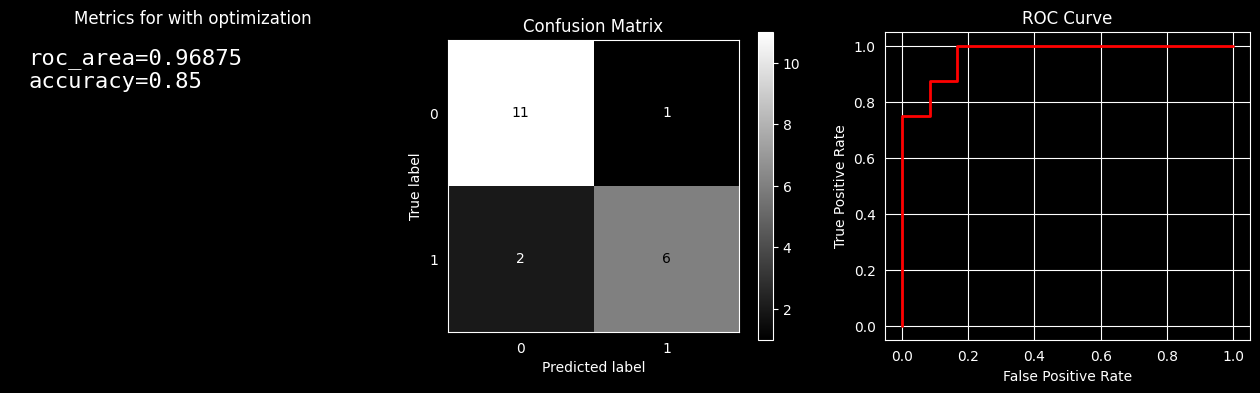

In [27]:
preds = pipe.predict(x_test)
probs = pipe.predict_proba(x_test)[:,1]

metrics(preds, probs, y_test['is Beaning'].values, 'with optimization')

# Saving model

In [28]:
import pickle
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)

## Load model

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



{'accuracy': 0.85, 'roc_score': 0.96875}

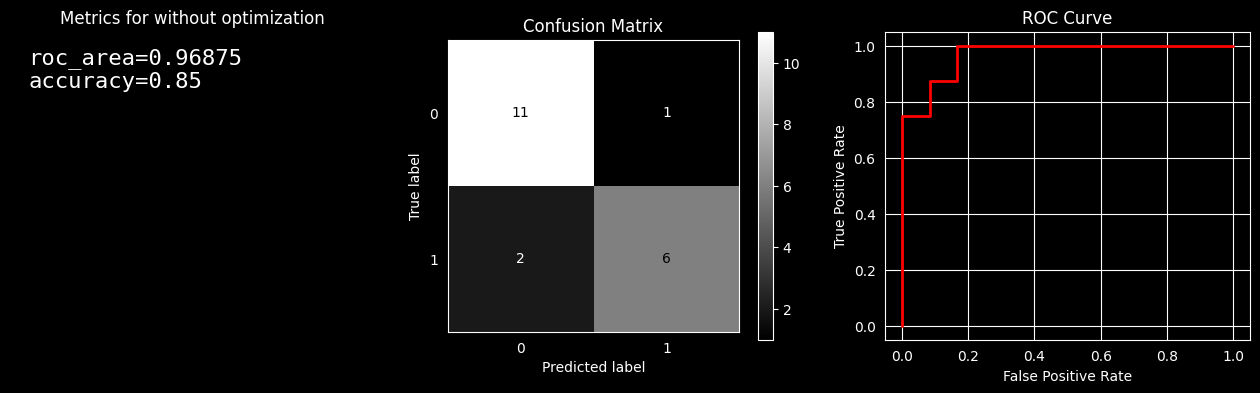

In [29]:
with open('pipe.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

preds = loaded_model.predict(x_test)
probs = loaded_model.predict_proba(x_test)[:,1]
metrics(preds, probs, y_test['is Beaning'].values, 'without optimization')